<h3>Library imports</h3>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [32]:
# Load data
houses = pd.read_csv('/Users/luisgarciafresno/pra_ii/datasets/base_data/houses_Madrid.csv')

<h3>Analyze Madrid_houses dataset</h3>

In [33]:
# Creating full address and geocoding data using latitude and longitude
houses['title'] = houses['title'].str.replace('Piso en venta en ', '')
houses['full_title'] = houses['title']+', '+houses['subtitle']

In [ ]:
# Creating new column with the normalized district name to find zip codes
houses['subtitle'] = houses['subtitle'].str.replace(', Madrid', '')
houses.head()

,Unnamed: 0,id,title,subtitle,sq_mt_built,sq_mt_useful,n_rooms,n_bathrooms,n_floors,sq_mt_allotment,...,has_parking,has_private_parking,has_public_parking,is_parking_included_in_price,parking_price,is_orientation_north,is_orientation_west,is_orientation_south,is_orientation_east,full_title
0,0,21742,"calle de Godella, 64",San Cristóbal,64.0,60.0,2,1.0,NaN,NaN,...,False,NaN,NaN,NaN,NaN,False,True,False,False,"calle de Godella, 64, San Cristóbal, Madrid"
1,1,21741,calle de la del Manojo de Rosas,Los Ángeles,70.0,NaN,3,1.0,NaN,NaN,...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"calle de la del Manojo de Rosas, Los Ángeles, ..."
2,2,21740,"calle del Talco, 68",San Andrés,94.0,54.0,2,2.0,NaN,NaN,...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"calle del Talco, 68, San Andrés, Madrid"
3,3,21739,calle Pedro Jiménez,San Andrés,64.0,NaN,2,1.0,NaN,NaN,...,False,NaN,NaN,NaN,NaN,False,False,True,False,"calle Pedro Jiménez, San Andrés, Madrid"
4,4,21738,carretera de Villaverde a Vallecas,Los Rosales,108.0,90.0,2,2.0,NaN,NaN,...,True,NaN,NaN,True,0.0,True,True,True,True,"carretera de Villaverde a Vallecas, Los Rosale..."


First approach to null values.


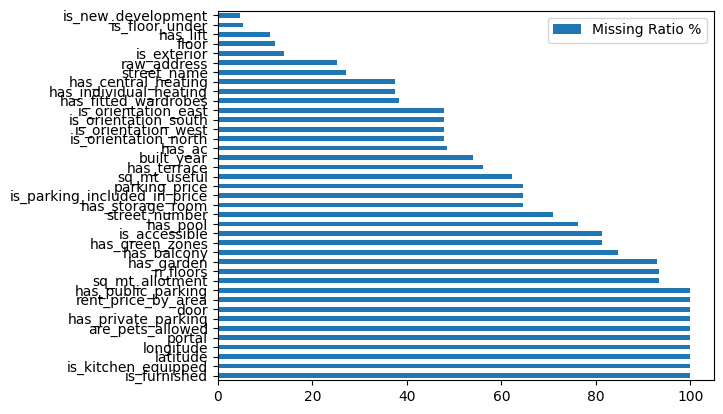

We're deleting only full null columns, then we're selecting only the columns we think are important for our case study.


In [37]:
# Coded originally found at https://stackoverflow.com/questions/69537383/how-to-plot-count-of-null-values-for-each-column-in-pandas-dataframe
def plot_nas(df: pd.DataFrame):
    if df.isnull().sum().sum() != 0:
        na_df = (df.isnull().sum() / len(df)) * 100
        df = df.drop(na_df[na_df > 75].index, axis=1) # Drop columns full of NA values
        # na_df = na_df.drop(na_df[na_df > 99].index).sort_values(ascending=False)
        # missing_data = pd.DataFrame({'Missing Ratio %' :na_df})
        # missing_data.plot(kind = "barh")
        # plt.show()
        return df
    else:
        print('No NAs found')

def plot_nas_nulls(df: pd.DataFrame):
    if df.isnull().sum().sum() != 0:
        na_df = (df.isnull().sum() / len(df)) * 100
        na_df = na_df.drop(na_df[na_df < 3].index).sort_values(ascending=False)
        missing_data = pd.DataFrame({'Missing Ratio %' :na_df})
        missing_data.plot(kind = "barh")
        plt.show()
        return df
    else:
        print('No NAs found')

print('First approach to null values.')
plot_nas_nulls(houses)

print("We're deleting only full null columns, then we're selecting only the columns we think are important for our case study.")
plot_width, plot_height = (30,60)
cleaning_houses_df = plot_nas(houses)

In [39]:
# cleaning_houses_df['zip_code'] = cleaning_houses_df['zip_code'].astype(int)
cleaning_houses_df.drop('title', axis=1, inplace=True)
cleaning_houses_df.drop('is_exact_address_hidden', axis=1, inplace=True)
cleaning_houses_df = cleaning_houses_df.applymap(lambda x: 1 if x == True else x)
cleaning_houses_df = cleaning_houses_df.applymap(lambda x: 0 if x == False else x)
print(cleaning_houses_df.shape)

(21742, 40)


/var/folders/_1/_rnshwnd0px1m82vsfm_3cg80000gn/T/ipykernel_77663/3844517858.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  cleaning_houses_df = cleaning_houses_df.applymap(lambda x: 1 if x == True else x)
/var/folders/_1/_rnshwnd0px1m82vsfm_3cg80000gn/T/ipykernel_77663/3844517858.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  cleaning_houses_df = cleaning_houses_df.applymap(lambda x: 0 if x == False else x)


In [40]:
# Current columns
print(cleaning_houses_df.columns)

Index(['Unnamed: 0', 'id', 'subtitle', 'sq_mt_built', 'sq_mt_useful',
       'n_rooms', 'n_bathrooms', 'raw_address', 'street_name', 'street_number',
       'floor', 'is_floor_under', 'neighborhood_id', 'operation', 'rent_price',
       'is_rent_price_known', 'buy_price', 'buy_price_by_area',
       'is_buy_price_known', 'house_type_id', 'is_renewal_needed',
       'is_new_development', 'built_year', 'has_central_heating',
       'has_individual_heating', 'has_ac', 'has_fitted_wardrobes', 'has_lift',
       'is_exterior', 'has_terrace', 'has_storage_room', 'energy_certificate',
       'has_parking', 'is_parking_included_in_price', 'parking_price',
       'is_orientation_north', 'is_orientation_west', 'is_orientation_south',
       'is_orientation_east', 'full_title'],
      dtype='object')


We're droping some of the columns we found here based on the idea we want to analyze.

In [42]:
final_selection_list = [
    'subtitle', 'sq_mt_built', 'n_rooms',
    'n_bathrooms', 'floor', 'buy_price', 'has_lift',
    'is_exterior', 'has_terrace',
    'has_parking', 'full_title'
]
clean_houses_df = cleaning_houses_df[final_selection_list]
clean_houses_df.head()

,subtitle,sq_mt_built,n_rooms,n_bathrooms,floor,buy_price,has_lift,is_exterior,has_terrace,has_parking,full_title
0,San Cristóbal,64.0,2,1.0,3,85000,0.0,1.0,NaN,0,"calle de Godella, 64, San Cristóbal, Madrid"
1,Los Ángeles,70.0,3,1.0,4,129900,1.0,1.0,1.0,0,"calle de la del Manojo de Rosas, Los Ángeles, ..."
2,San Andrés,94.0,2,2.0,1,144247,1.0,1.0,NaN,0,"calle del Talco, 68, San Andrés, Madrid"
3,San Andrés,64.0,2,1.0,Bajo,109900,1.0,1.0,NaN,0,"calle Pedro Jiménez, San Andrés, Madrid"
4,Los Rosales,108.0,2,2.0,4,260000,1.0,1.0,NaN,1,"carretera de Villaverde a Vallecas, Los Rosale..."


In [44]:
print(clean_houses_df.shape)
clean_houses_df.to_csv('/Users/luisgarciafresno/pra_ii/datasets/analyzed_data/houses_dataset_after_cleaning.csv')

(21742, 11)


Esta primera limpieza se ha basado, principalmente, en la eliminación de columnas que no eran de nuestro interés, así como otras columnas con un gran número de valores nulos que no aportaban información al conjunto global de los datos, funcionando casi como un valor constante (en este caso nulo). Se explicará en detalle en la memoria de la práctica. Posteriormente se continuará con el análisis del resto de valores nulos así como los valores extremos para, finalmente, realizar un estudio estadístico del conjunto de datos.